## Gemini spectrum

In [1]:
import ipympl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from astropy.io import fits
from glob import glob
import lightkurve as lk
%matplotlib notebook
from astropy.wcs import WCS

from mpfit import mpfit

/Users/ryanr/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ryanr/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

In [3]:
def F(x, p):

	# The model to be fitted to the data

	return  p[0] * np.exp(-((x-p[1])**2)/(2*p[2]**2))



def myfunct(p, fjac=None, x=None, y=None, err=None):

	# The model evaluated at the provided x values with parameters stored in p

	model = F(x, p)

	# The deviates are the differences between the measurements y and the model 

	# evaluated at each point x normalised by the standard deviation in the 

	# measurement.

	deviates = np.array((y - model) / err, dtype=float)

	# We return p status flag and the deviates.

	return 0, deviates

model = lambda x, p : p[0] * np.exp(-((x-p[1])**2)/(2*p[2]**2))	# the model.

In [5]:
path = '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/203830112/gemini/C11_CVobj_clean.fits'
hdu = fits.open(path)
header = hdu[0].header

In [6]:
data = hdu[0].data
sig_data = 0.2 * data
sig_data[:] = 0.02
wav = np.arange(data.shape[0]) * header['CDELT1'] + header['CRVAL1']

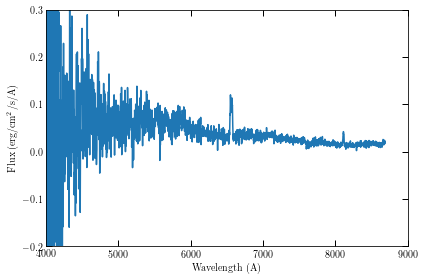

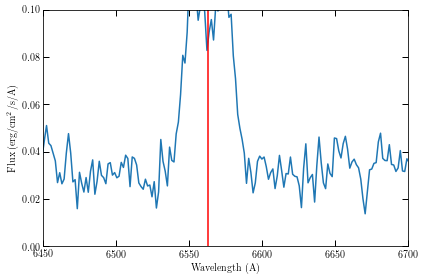

In [7]:
plt.figure()
plt.plot(wav,data)
plt.ylim(-.2,.3)
plt.xlim(4000,9000)
plt.ylabel('Flux (erg/cm$^2$/s/A)')
plt.xlabel('Wavelength (A)')
plt.tight_layout()

plt.figure()
plt.plot(wav,data)
plt.axvline(6562.8,color='red')

plt.ylim(0,0.1)
plt.xlim(6450,6700)
plt.ylabel('Flux (erg/cm$^2$/s/A)')
plt.xlabel('Wavelength (A)')
plt.tight_layout()

In [8]:
np.where(wav <=6700)[0][-1]

1818

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

/Users/ryanr/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


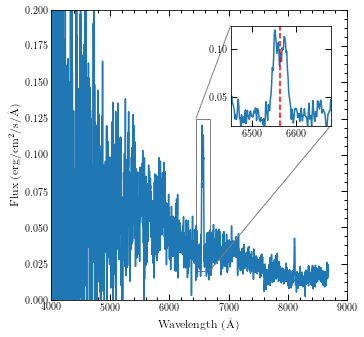

In [11]:
fig, ax = plt.subplots()
ax.plot(wav,data)
plt.minorticks_on()
plt.ylim(0,.2)
plt.xlim(4000,9000)
plt.ylabel(r'Flux (erg/cm$^2$/s/\AA)',fontsize=12)
plt.xlabel(r'Wavelength (\AA)',fontsize=12)
axins = inset_axes(ax,width='25%',height='25%',bbox_to_anchor=([-70,-70,400,400]))
axins.plot(wav[1652:1817],data[1652:1817])
axins.axvline(6562.8,color='red',ls='--')

# sub region of the original image
x1, x2, y1, y2 = 6450, 6680, 0.020, 0.125
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)


# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
#fig.set_size_inches(1.5*fig_width,1.5*fig_width)
plt.tight_layout()
fig.set_size_inches(1.5*fig_width,1.5*fig_width)
plt.savefig('Gem_spec.pdf');

In [11]:
-2.5*np.log10(0.02*(6500**2)/3e18) - 48.6

-17.224338635575076

In [18]:
-2.5*np.log10(1e-13) - 48.6

-16.1

In [12]:
paramname = ['a', 'b', 'c']

parinfo = [{

	'value': 0.02, 

	'fixed':False, 

	'limited':[False,False],

	'limits':[0,0],

	'parname':paramname[i],

	'mpside':2,

	'mpprint':1

	 } for i in range(3)]


In [33]:
index = np.where(np.isclose(wav,6560,atol=100))

In [29]:
p0 = np.array([0.14,6562.8,.9]) # amplitude, centre, spread

In [34]:
mean = np.nanmean(data[index][50])

In [35]:
mean

0.025566308

In [36]:
fa = {'x':wav[index], 'y':data[index]-mean, 'err':sig_data[index]}	# function keywords

m = mpfit.mpfit(myfunct, p0, functkw=fa, parinfo=parinfo)

p_fit = m.params



# Print the normalised chi-squared value

chi_squared = np.sum( (data[index]-mean - F(wav[index],m.params))**2 / sig_data[index]**2)

print("Chi-squared / DOF = {:.2f}".format(chi_squared / m.dof))

Iter       1    CHI-SQUARE =  358.6509426  DOF =  130
   a = 0.14  
   b = 6562.8  
   c = 0.9  
Iter       2    CHI-SQUARE =  341.2428405  DOF =  130
   a = 0.07377480102  
   b = 6562.754169  
   c = 1.296343304  
Iter       3    CHI-SQUARE =  314.2791986  DOF =  130
   a = 0.05525604489  
   b = 6562.679573  
   c = 2.558312691  
Iter       4    CHI-SQUARE =  233.0315325  DOF =  130
   a = 0.06778691897  
   b = 6562.435931  
   c = 5.11944493  
Iter       5    CHI-SQUARE =  104.3838055  DOF =  130
   a = 0.06739409961  
   b = 6562.089436  
   c = 10.27365715  
Iter       6    CHI-SQUARE =  47.17135591  DOF =  130
   a = 0.07208782436  
   b = 6562.792946  
   c = 18.53204518  
Iter       7    CHI-SQUARE =  40.10072988  DOF =  130
   a = 0.08505122185  
   b = 6563.790887  
   c = 14.5262692  
Iter       8    CHI-SQUARE =  38.9902722  DOF =  130
   a = 0.08490351253  
   b = 6563.421149  
   c = 15.60659492  
Iter       9    CHI-SQUARE =  38.94674629  DOF =  130
   a = 0.0858158670

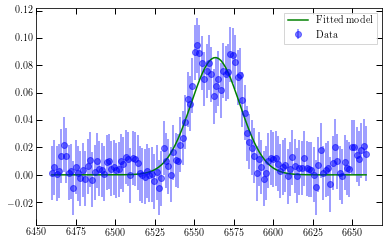

In [37]:
plt.figure()

plt.errorbar(wav[index],data[index]-mean,fmt='bo',yerr=sig_data[index],label='Data',alpha = 0.5)

plt.plot(wav[index],model(wav[index],p_fit),'g-',label='Fitted model')

plt.legend()


In [ ]:
x = np.linspace(-20, 20, 500)
y_real = norm(x, mean1, std1) + norm(x, mean2, std2)

In [98]:
index = np.where(np.isclose(wav,6560,atol=100))

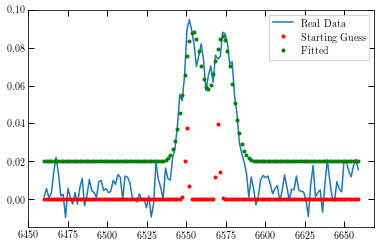

In [101]:
from scipy.optimize import leastsq

######################################
# Setting up test data
def norm(x, mean, sd):
    norm = []
    for i in range(x.size):
        norm += [1.0/(sd*np.sqrt(2*np.pi))*np.exp(-(x[i] - mean)**2/(2*sd**2))]
    return np.array(norm)

######################################
# Solving
m, dm, sd1, sd2 = [6550, 20, 1, 1]
p = [m, dm, sd1, sd2] # Initial guesses for leastsq
y_init = 0.1*norm(wav[index], m, sd1) + 0.1*norm(wav[index], m + dm, sd2) # For final comparison plot

def res(p, y, x):
    m, dm, sd1, sd2 = p
    m1 = m
    m2 = m1 + dm
    y_fit = norm(x, m1, sd1) + norm(x, m2, sd2)
    err = y - y_fit
    return err

plsq = leastsq(res, p, args = (data[index]-mean, wav[index]))

y_est = norm(wav[index], plsq[0][0], plsq[0][2]) + norm(wav[index], plsq[0][0] + plsq[0][1], plsq[0][3])

plt.figure()
plt.plot(wav[index], data[index]-mean, label='Real Data')
plt.plot(wav[index], y_init, 'r.', label='Starting Guess')
plt.plot(wav[index], y_est+0.02, 'g.', label='Fitted')
plt.legend()
plt.show()

In [45]:
plsq[0]

array([6.55406561e+03, 1.89475076e+01, 5.86206372e+00, 6.07255080e+00])

In [48]:
abs(plsq[0][0] - 6562.8)

8.734385908711374

In [75]:
ls = 6562.8
lo = plsq[0][0] #+ plsq[0][1]

In [157]:
beta = ((ls/lo)**2-1)/(1+(ls/lo)**2)
def Velocity(lo):
    ls = 6562.8
    c = 299792458
    beta = ((ls/lo)**2-1)/(1+(ls/lo)**2)
    vel = c*beta
    return vel

In [77]:
beta

0.0013317788399728131

In [73]:
v = beta*299792458

In [74]:
v/1000

-466.17822163510635

Calculate the orbital radius of the superhump

In [80]:
omega = 2*np.pi/(80*60) # 80 mins for a complete orbit
r = 4E5/omega

In [110]:
r/1e8

3.055774907364391

In [85]:
r/1496e11

2.0426302856713844e-06

In [88]:
rkm = r/1000
rwdr = rkm/7000

In [89]:
rwdr

43.65392724806273

v2

In [102]:
def F(x, amp,mean,sd):

	# The model to be fitted to the data

	return  amp * np.exp(-((x-mean)**2)/(2*sd**2))

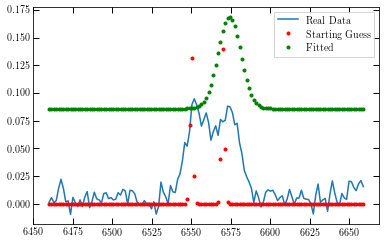

In [105]:
from scipy.optimize import leastsq

######################################
# Setting up test data
def norm(x, mean, sd):
    norm = []
    for i in range(x.size):
        norm += [1.0/(sd*np.sqrt(2*np.pi))*np.exp(-(x[i] - mean)**2/(2*sd**2))]
    return np.array(norm)

######################################
# Solving
#m, dm, sd1, sd2 = [6550, 20, 1, 1]
amp1,amp2,m1,m2,sd1,sd2 = [0.14,0.14,6550,6570,1,1]
p = [amp1,amp2,m1,m2,sd1,sd2] # Initial guesses for leastsq
y_init = F(wav[index],amp1,m1,sd1) + F(wav[index],amp2,m2,sd2)  # For final comparison plot

def res(p, y, x):
    amp1, amp2, m1, m2, sd1, sd2 = p
    y_fit = F(x, amp1, m1, sd1) + F(x, amp2, m2, sd2)
    err = y - y_fit
    return err

plsq = leastsq(res, p, args = (data[index]-mean, wav[index]))

y_est = F(wav[index], plsq[0][0], plsq[0][2], plsq[0][3]) + F(wav[index], plsq[0][1], plsq[0][3], plsq[0][5])

plt.figure()
plt.plot(wav[index], data[index]-mean, label='Real Data')
plt.plot(wav[index], y_init, 'r.', label='Starting Guess')
plt.plot(wav[index], y_est, 'g.', label='Fitted')
plt.legend()
plt.show()

In [106]:
plsq

(array([8.59002622e-02, 8.29553036e-02, 6.55355353e+03, 6.57411393e+03,
        7.46432606e+00, 7.14006147e+00]), 1)

In [107]:
p

[0.14, 0.14, 6550, 6570, 1, 1]

In [116]:
wav

array([3960.43701172, 3961.94364893, 3963.45028615, ..., 8683.74468267,
       8685.25131989, 8686.7579571 ])

In [119]:
c = 299792458
speed = wav[index]
speed = c * ((ls/speed)**2 - 1)/(1 + (ls/speed)**2)/1000

In [120]:
speed

array([ 4735.142634  ,  4665.24814167,  4595.36943784,  4525.50652285,
        4455.65939704,  4385.82806076,  4316.01251434,  4246.21275809,
        4176.42879233,  4106.66061739,  4036.90823357,  3967.17164118,
        3897.4508405 ,  3827.74583184,  3758.05661549,  3688.38319172,
        3618.72556081,  3549.08372304,  3479.45767867,  3409.84742796,
        3340.25297117,  3270.67430854,  3201.11144033,  3131.56436678,
        3062.03308811,  2992.51760456,  2923.01791635,  2853.5340237 ,
        2784.06592683,  2714.61362594,  2645.17712123,  2575.75641291,
        2506.35150117,  2436.96238619,  2367.58906816,  2298.23154726,
        2228.88982365,  2159.5638975 ,  2090.25376898,  2020.95943824,
        1951.68090543,  1882.4181707 ,  1813.17123419,  1743.94009604,
        1674.72475637,  1605.52521531,  1536.34147299,  1467.17352951,
        1398.02138499,  1328.88503953,  1259.76449324,  1190.6597462 ,
        1121.57079851,  1052.49765025,   983.4403015 ,   914.39875233,
      

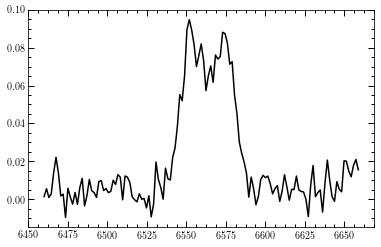

In [135]:
plt.figure()
plt.plot(wav[index], data[index]-mean, 'k')
plt.minorticks_on()

In [111]:
from astropy.modeling import models, fitting

In [143]:
xdata

array([6459.94815242, 6461.45478964, 6462.96142685, 6464.46806407,
       6465.97470129, 6467.4813385 , 6468.98797572, 6470.49461293,
       6472.00125015, 6473.50788736, 6475.01452458, 6476.52116179,
       6478.02779901, 6479.53443623, 6481.04107344, 6482.54771066,
       6484.05434787, 6485.56098509, 6487.0676223 , 6488.57425952,
       6490.08089674, 6491.58753395, 6493.09417117, 6494.60080838,
       6496.1074456 , 6497.61408281, 6499.12072003, 6500.62735724,
       6502.13399446, 6503.64063168, 6505.14726889, 6506.65390611,
       6508.16054332, 6509.66718054, 6511.17381775, 6512.68045497,
       6514.18709219, 6515.6937294 , 6517.20036662, 6518.70700383,
       6520.21364105, 6521.72027826, 6523.22691548, 6524.73355269,
       6526.24018991, 6527.74682713, 6529.25346434, 6530.76010156,
       6532.26673877, 6533.77337599, 6535.2800132 , 6536.78665042,
       6538.29328763, 6539.79992485, 6541.30656207, 6542.81319928,
       6544.3198365 , 6545.82647371, 6547.33311093, 6548.83974

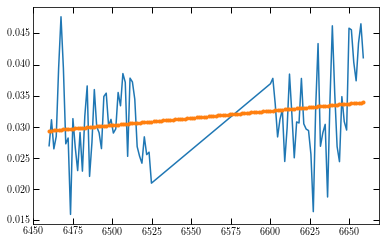

In [151]:
xdata = wav[index]
ydata = data[index]
ind = (xdata <= 6525) | (xdata >= 6600)
# Linear model
l1 = models.Polynomial1D(1)#(0.1,0.02)
l_init = l1
fitter = fitting.LinearLSQFitter()
l_fit = fitter(l_init, xdata[ind], ydata[ind])

detrend = ydata - l_fit(xdata)
plt.figure()
plt.plot(xdata[ind],ydata[ind])
plt.plot(xdata,l_fit(xdata),'.')

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.005635605401613303
            Iterations: 47
            Function evaluations: 379
            Gradient evaluations: 47


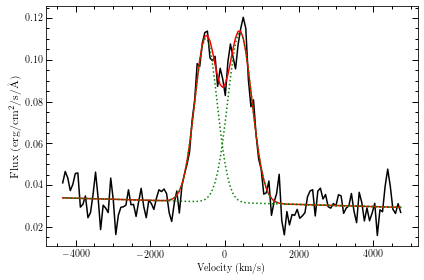

In [154]:
xdata = wav[index]
ydata = data[index]
ind = (xdata <= 6525) | (xdata >= 6600)
# Linear model
l1 = models.Polynomial1D(1)#(0.1,0.02)
l_init = l1
fitter = fitting.LinearLSQFitter()
l_fit = fitter(l_init, xdata[ind], ydata[ind])

detrend = ydata - l_fit(xdata)

g1 = models.Gaussian1D(0.1, 6550, 1.0) # First gaussian - init guess
g2 = models.Gaussian1D(0.9, 6570, 1.0) # Second gaussian - init guess

g_tot = g1 + g2 # Model is two sum of two Gaussians

# Now to fit the data create a new superposition with initial
# guesses for the parameters:
gg_init = g_tot
fitter = fitting.SLSQPLSQFitter()
gg_fit = fitter(gg_init, xdata, detrend)

# Plot the data with the best-fit model
plt.figure()
plt.plot(speed, detrend + l_fit(xdata), 'k')
plt.plot(speed, gg_fit[0](xdata) + gg_fit[1](xdata) + l_fit(xdata), 'r-')
plt.plot(speed, gg_fit[0](xdata) + l_fit(xdata), 'g:')
plt.plot(speed, gg_fit[1](xdata) + l_fit(xdata), 'g:')

plt.minorticks_on()
plt.ylabel(r'Flux (erg/cm$^2$/s/\AA)',fontsize=12)
plt.xlabel(r'Velocity (km/s)')
plt.tight_layout()
fig.set_size_inches(1.5*fig_width,1.5*fig_width)
plt.savefig('Spec_fit.pdf');


In [155]:
gg_fit[0]

<Gaussian1D(amplitude=0.08162542, mean=6553.81360076, stddev=7.05133427)>

In [156]:
gg_fit[1]

<Gaussian1D(amplitude=0.07837323, mean=6573.8264413, stddev=6.65186914)>

In [161]:
Velocity(6573.81360076)/1000

-502.6854291062593

In [13]:
wcs = WCS(header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [22]:
wcs.all_pix2world((0),0)

IndexError: tuple index out of range

In [29]:
hdu[0].error

AttributeError: 'PrimaryHDU' object has no attribute 'error'

In [15]:
test = np.zeros((len(data),2))
test[:,0] = wav
test[:,1] = data

In [16]:
test

array([[ 3.95881934e+03, -2.35866547e+01],
       [ 3.96032735e+03, -2.35858650e+01],
       [ 3.96183537e+03, -2.35891380e+01],
       ...,
       [ 8.88702280e+03,  1.87726656e-03],
       [ 8.88853082e+03, -7.84186460e-03],
       [ 8.89003884e+03, -1.47705153e-03]])

In [17]:
np.savetxt('/Users/ryanr/Desktop/test.txt',test)

In [144]:
header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 3271 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
OBJECT  = 'KSN Fest'           / Name of the object observed                    
DATE    = '2018-07-25T17:26:23' / Date FITS file was generated                  
IRAF-TLM= '2018-07-25T17:26:23' / Time of last modification                     
FIXPIX  = 'Jul 25  9:38 Bad pixel file is tmpbpm11756_466.pl'                   
CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               
CRPIX1  =                   1. / Ref pix of axis 1                              
CRVAL1  =        3958.819335